Importing and cleaning the  raw data files

In [1]:
import pandas as pd

In [2]:
file1 = pd.read_csv('RTRA_Employ_2NAICS_00_05.csv', parse_dates=([['SYEAR', 'SMTH']]))
file2 = pd.read_csv('RTRA_Employ_2NAICS_06_10.csv', parse_dates=([['SYEAR', 'SMTH']]))
file3 = pd.read_csv('RTRA_Employ_2NAICS_11_15.csv', parse_dates=([['SYEAR', 'SMTH']]))
file4 = pd.read_csv('RTRA_Employ_2NAICS_16_20.csv', parse_dates=([['SYEAR', 'SMTH']]))
file5 = pd.read_csv('RTRA_Employ_2NAICS_97_99.csv', parse_dates=([['SYEAR', 'SMTH']]))

In [3]:
file6 = pd.read_csv('RTRA_Employ_3NAICS_00_05.csv', parse_dates=([['SYEAR', 'SMTH']]))
file7 = pd.read_csv('RTRA_Employ_3NAICS_06_10.csv', parse_dates=([['SYEAR', 'SMTH']]))
file8 = pd.read_csv('RTRA_Employ_3NAICS_11_15.csv', parse_dates=([['SYEAR', 'SMTH']]))
file9 = pd.read_csv('RTRA_Employ_3NAICS_16_20.csv', parse_dates=([['SYEAR', 'SMTH']]))
file10 = pd.read_csv('RTRA_Employ_3NAICS_97_99.csv', parse_dates=([['SYEAR', 'SMTH']]))

In [4]:
file11 = pd.read_csv('RTRA_Employ_4NAICS_00_05.csv', parse_dates=([['SYEAR', 'SMTH']]))
file12 = pd.read_csv('RTRA_Employ_4NAICS_06_10.csv', parse_dates=([['SYEAR', 'SMTH']]))
file13 = pd.read_csv('RTRA_Employ_4NAICS_11_15.csv', parse_dates=([['SYEAR', 'SMTH']]))
file14 = pd.read_csv('RTRA_Employ_4NAICS_16_20.csv', parse_dates=([['SYEAR', 'SMTH']]))
file15 = pd.read_csv('RTRA_Employ_4NAICS_97_99.csv', parse_dates=([['SYEAR', 'SMTH']]))

Combine the files by level of NAICS(2digit, 3digit,4digit)

In [5]:
two_digit = pd.concat([file1, file2, file3, file4, file5])

In [6]:
three_digit = pd.concat([file6, file7, file8, file9, file10])

In [7]:
four_digit = pd.concat([file11, file12, file13, file14, file15])

In [8]:
two_digit.head()

,SYEAR_SMTH,NAICS,_EMPLOYMENT_
0,2000-01-01,Accommodation and food services [72],148000
1,2000-01-01,"Administrative and support, waste management a...",59250
2,2000-01-01,"Agriculture, forestry, fishing and hunting [11]",61750
3,2000-01-01,"Arts, entertainment and recreation [71]",39500
4,2000-01-01,Construction [23],106250


Extract the NAICS from the string

In [9]:
two_digit['NAICS'] = two_digit.NAICS.str.extract('(\d+)')
three_digit['NAICS'] = three_digit.NAICS.str.extract('(\d+)')
 #four digit NAICS are not strings already integers

In [10]:
two_digit.head()

,SYEAR_SMTH,NAICS,_EMPLOYMENT_
0,2000-01-01,72,148000
1,2000-01-01,56,59250
2,2000-01-01,11,61750
3,2000-01-01,71,39500
4,2000-01-01,23,106250


Some NAICS are missing so let's look (categorized "other" in the csv if we sliced the original data on those rows before extracting the NAICS)

In [11]:
three_digit[three_digit['NAICS'].isna()]

,SYEAR_SMTH,NAICS,_EMPLOYMENT_
61,2000-01-01,NaN,250
84,2000-01-01,NaN,13500
163,2000-02-01,NaN,1500
186,2000-02-01,NaN,13000
265,2000-03-01,NaN,2500
...,...,...,...
3484,1999-10-01,NaN,16750
3564,1999-11-01,NaN,250
3587,1999-11-01,NaN,15000
3667,1999-12-01,NaN,0


In [12]:
three_digit.dropna(inplace=True)

Open the official dictionary file

In [13]:
lmo = pd.read_excel('LMO_Detailed_Industries_by_NAICS.xlsx')
lmo['NAICS'] = lmo['NAICS'].replace(regex='&', value=',').astype('str')

lmo.head()

,LMO_Detailed_Industry,NAICS
0,Farms,"111 , 112"
1,"Fishing, hunting and trapping",114
2,Forestry and logging,113
3,Support activities for agriculture and forestry,115
4,Oil and gas extraction,211


In [14]:
#create a separate dictionary for each NAICS level
#unify all separators to comma and then extract it
#extract the NAICS each to its dictionary
two_digit_dict = {}
three_digit_dict = {} 
four_digit_dict = {}

for name, numbers in zip(lmo['LMO_Detailed_Industry'], lmo['NAICS']):
    num_list = numbers.split(',')
    num_list = [x.strip() for x in num_list]
    for i in range(len(num_list)):
        if len(num_list[i]) == 2:
            two_digit_dict[num_list[i]] = name
        elif len(num_list[i]) == 3:
            three_digit_dict[num_list[i]] = name 
        elif len(num_list[i]) == 4:
            four_digit_dict[num_list[i]] = name

In [15]:
two_digit_dict

{'22': 'Utilities',
 '23': 'Construction',
 '41': 'Wholesale trade',
 '53': 'Real estate rental and leasing',
 '55': 'Business, building and other support services',
 '56': 'Business, building and other support services',
 '81': 'Repair, personal and non-profit services'}

In [16]:
three_digit_dict

{'111': 'Farms',
 '112': 'Farms',
 '114': 'Fishing, hunting and trapping',
 '113': 'Forestry and logging',
 '115': 'Support activities for agriculture and forestry',
 '211': 'Oil and gas extraction',
 '213': 'Support activities for mining and oil and gas extraction',
 '212': 'Mining',
 '311': 'Food, beverage and tobacco manufacturing',
 '312': 'Food, beverage and tobacco manufacturing',
 '321': 'Wood product manufacturing',
 '322': 'Paper manufacturing',
 '331': 'Primary metal manufacturing',
 '332': 'Fabricated metal product manufacturing',
 '333': 'Machinery manufacturing',
 '313': 'Other manufacturing',
 '314': 'Other manufacturing',
 '315': 'Other manufacturing',
 '316': 'Other manufacturing',
 '323': 'Other manufacturing',
 '324': 'Other manufacturing',
 '325': 'Other manufacturing',
 '326': 'Other manufacturing',
 '327': 'Other manufacturing',
 '334': 'Other manufacturing',
 '335': 'Other manufacturing',
 '337': 'Other manufacturing',
 '339': 'Other manufacturing',
 '441': 'Motor

There is a double definition for this NAICS so better to clarify the definition

In [17]:
three_digit_dict['446'] = 'Health and personal care stores'

In [18]:
#unpack the 3 dictionaries to dataframes
data_items1 = two_digit_dict.items()
data_list_1 = list(data_items1)

df1 = pd.DataFrame(data_list_1)
df1.columns = ['NAICS', 'Name']

In [19]:
#unpack the dictionaries
data_items2 = three_digit_dict.items()
data_list_2 = list(data_items2)

df2 = pd.DataFrame(data_list_2)
df2.columns = ['NAICS', 'Name']

In [20]:
#unpack the dictionaries
data_items3 = four_digit_dict.items()
data_list_3 = list(data_items3)

df3 = pd.DataFrame(data_list_3)
df3.columns = ['NAICS', 'Name']

In [21]:
df3.head()

,NAICS,Name
0,3366,Ship and boat building
1,3361,Transportation equipment manufacturing (exclud...
2,3362,Transportation equipment manufacturing (exclud...
3,3363,Transportation equipment manufacturing (exclud...
4,3364,Transportation equipment manufacturing (exclud...


In [22]:
#merge each dictionary with its type of file

In [23]:
full_two_digit= two_digit.merge(df1, on='NAICS', how='left')

In [24]:
full_three_digit= three_digit.merge(df2, on='NAICS', how='left')

In [25]:
four_digit['NAICS'] = four_digit['NAICS'].astype(str) #NAICS here are originally integers

In [26]:
full_four_digit= four_digit.merge(df3, on='NAICS', how='left')

In [27]:
full_two_digit.head()

,SYEAR_SMTH,NAICS,_EMPLOYMENT_,Name
0,2000-01-01,72,148000,NaN
1,2000-01-01,56,59250,"Business, building and other support services"
2,2000-01-01,11,61750,NaN
3,2000-01-01,71,39500,NaN
4,2000-01-01,23,106250,Construction


Fixing the two digit data(NaN)

In [28]:
full_two_digit[full_two_digit['Name'].isna()]

,SYEAR_SMTH,NAICS,_EMPLOYMENT_,Name
0,2000-01-01,72,148000,NaN
2,2000-01-01,11,61750,NaN
3,2000-01-01,71,39500,NaN
5,2000-01-01,61,143500,NaN
6,2000-01-01,52,78500,NaN
...,...,...,...,...
5463,1999-12-01,21,13750,NaN
5465,1999-12-01,54,135250,NaN
5466,1999-12-01,91,94500,NaN
5468,1999-12-01,44,230750,NaN


According to the requirements we depend only on the NAICS , and only from a highr level definition so since there is only 7 definitions in two_digit_dict it is likely to find a lot of data without name , so we have to drop those, because we can't define them with 3digit.

In [29]:
full_two_digit.dropna(inplace=True)

problem to solve: The missing names are not defined by 3 digits but in the file defining all the NAICS it has a 2-digit NAICS. and since we can define according to a higher level the 3digit from 2 digit

In [30]:
full_three_digit.head()

,SYEAR_SMTH,NAICS,_EMPLOYMENT_,Name
0,2000-01-01,914,500,Local and Indigenous public administration
1,2000-01-01,721,33750,Accommodation services
2,2000-01-01,561,55250,NaN
3,2000-01-01,481,17500,Air transportation
4,2000-01-01,621,53000,Ambulatory health care services


In [31]:
full_three_digit[full_three_digit['Name'].isna()]

,SYEAR_SMTH,NAICS,_EMPLOYMENT_,Name
2,2000-01-01,561,55250,NaN
10,2000-01-01,416,14250,NaN
11,2000-01-01,419,250,NaN
16,2000-01-01,236,26750,NaN
21,2000-01-01,611,143500,NaN
...,...,...,...,...
27569,1999-12-01,811,43250,NaN
27572,1999-12-01,238,71750,NaN
27581,1999-12-01,336,12750,NaN
27583,1999-12-01,221,10000,NaN


In [32]:
full_three_digit.head()

,SYEAR_SMTH,NAICS,_EMPLOYMENT_,Name
0,2000-01-01,914,500,Local and Indigenous public administration
1,2000-01-01,721,33750,Accommodation services
2,2000-01-01,561,55250,NaN
3,2000-01-01,481,17500,Air transportation
4,2000-01-01,621,53000,Ambulatory health care services


UPDATE THE MISSING NANS NAICS

In [33]:
full_three_digit.loc[full_three_digit['Name'].isna(), 'NAICS'] = full_three_digit['NAICS'].apply(lambda x: str(x)[:-1])

In [34]:
full_three_digit.head()

,SYEAR_SMTH,NAICS,_EMPLOYMENT_,Name
0,2000-01-01,914,500,Local and Indigenous public administration
1,2000-01-01,721,33750,Accommodation services
2,2000-01-01,56,55250,NaN
3,2000-01-01,481,17500,Air transportation
4,2000-01-01,621,53000,Ambulatory health care services


NOW LET'S UPDATE THE DATA ON THE 2D DICTIONARY

In [35]:
full_three_digit_updated = full_three_digit.merge(df1, on='NAICS', how='left')

In [36]:
full_three_digit_updated

,SYEAR_SMTH,NAICS,_EMPLOYMENT_,Name_x,Name_y
0,2000-01-01,914,500,Local and Indigenous public administration,NaN
1,2000-01-01,721,33750,Accommodation services,NaN
2,2000-01-01,56,55250,NaN,"Business, building and other support services"
3,2000-01-01,481,17500,Air transportation,NaN
4,2000-01-01,621,53000,Ambulatory health care services,NaN
...,...,...,...,...,...
27583,1999-12-01,22,10000,NaN,Utilities
27584,1999-12-01,493,4500,Warehousing and storage,NaN
27585,1999-12-01,56,4500,NaN,"Business, building and other support services"
27586,1999-12-01,483,6750,Water transportation,NaN


In [37]:
full_three_digit_updated['Name'] = full_three_digit_updated['Name_x'].combine_first(full_three_digit_updated['Name_y'])


In [38]:
full_three_digit_updated= full_three_digit_updated.drop(['Name_x', 'Name_y'], axis=1)

In [39]:
full_three_digit_updated

,SYEAR_SMTH,NAICS,_EMPLOYMENT_,Name
0,2000-01-01,914,500,Local and Indigenous public administration
1,2000-01-01,721,33750,Accommodation services
2,2000-01-01,56,55250,"Business, building and other support services"
3,2000-01-01,481,17500,Air transportation
4,2000-01-01,621,53000,Ambulatory health care services
...,...,...,...,...
27583,1999-12-01,22,10000,Utilities
27584,1999-12-01,493,4500,Warehousing and storage
27585,1999-12-01,56,4500,"Business, building and other support services"
27586,1999-12-01,483,6750,Water transportation


The rest doesn't match any NAICS so Will be dropped

In [40]:
full_three_digit_updated.dropna(inplace=True)

In [41]:
full_three_digit_updated

,SYEAR_SMTH,NAICS,_EMPLOYMENT_,Name
0,2000-01-01,914,500,Local and Indigenous public administration
1,2000-01-01,721,33750,Accommodation services
2,2000-01-01,56,55250,"Business, building and other support services"
3,2000-01-01,481,17500,Air transportation
4,2000-01-01,621,53000,Ambulatory health care services
...,...,...,...,...
27583,1999-12-01,22,10000,Utilities
27584,1999-12-01,493,4500,Warehousing and storage
27585,1999-12-01,56,4500,"Business, building and other support services"
27586,1999-12-01,483,6750,Water transportation


Repeat the same steps to 3digit and 2digit level 

In [42]:
full_four_digit[full_four_digit['Name'].isna()]

,SYEAR_SMTH,NAICS,_EMPLOYMENT_,Name
0,2000-01-01,1100,500,NaN
1,2000-01-01,1111,0,NaN
2,2000-01-01,1112,2000,NaN
3,2000-01-01,1113,250,NaN
4,2000-01-01,1114,7750,NaN
...,...,...,...,...
85567,1999-12-01,9111,2250,NaN
85568,1999-12-01,9120,28500,NaN
85569,1999-12-01,9130,30250,NaN
85570,1999-12-01,9141,500,NaN


In [43]:
full_four_digit.loc[full_four_digit['Name'].isna(), 'NAICS'] = full_four_digit['NAICS'].apply(lambda x: str(x)[:-1])

In [44]:
full_four_digit

,SYEAR_SMTH,NAICS,_EMPLOYMENT_,Name
0,2000-01-01,110,500,NaN
1,2000-01-01,111,0,NaN
2,2000-01-01,111,2000,NaN
3,2000-01-01,111,250,NaN
4,2000-01-01,111,7750,NaN
...,...,...,...,...
85567,1999-12-01,911,2250,NaN
85568,1999-12-01,912,28500,NaN
85569,1999-12-01,913,30250,NaN
85570,1999-12-01,914,500,NaN


In [45]:
full_four_digit_updated = full_four_digit.merge(df2, on='NAICS', how='left')

In [46]:
full_four_digit_updated['Name'] = full_four_digit_updated['Name_x'].combine_first(full_four_digit_updated['Name_y'])


In [47]:
full_four_digit_updated= full_four_digit_updated.drop(['Name_x', 'Name_y'], axis=1)

updated on 2digit dictionary

In [48]:
full_four_digit_updated.loc[full_four_digit_updated['Name'].isna(), 'NAICS'] = full_four_digit_updated['NAICS'].apply(lambda x: str(x)[:-1])

In [49]:
full_four_digit_updated_2 = full_four_digit_updated.merge(df1, on='NAICS', how='left')

In [50]:
full_four_digit_updated_2['Name'] = full_four_digit_updated_2['Name_x'].combine_first(full_four_digit_updated_2['Name_y'])


In [51]:
full_four_digit_updated_2= full_four_digit_updated_2.drop(['Name_x', 'Name_y'], axis=1)

In [52]:
full_four_digit_updated_2

,SYEAR_SMTH,NAICS,_EMPLOYMENT_,Name
0,2000-01-01,11,500,NaN
1,2000-01-01,111,0,Farms
2,2000-01-01,111,2000,Farms
3,2000-01-01,111,250,Farms
4,2000-01-01,111,7750,Farms
...,...,...,...,...
85567,1999-12-01,911,2250,Federal government public administration
85568,1999-12-01,912,28500,Provincial and territorial public administration
85569,1999-12-01,913,30250,Local and Indigenous public administration
85570,1999-12-01,914,500,Local and Indigenous public administration


In [53]:
full_four_digit_updated_2[full_four_digit_updated_2['Name'].isna()]

,SYEAR_SMTH,NAICS,_EMPLOYMENT_,Name
0,2000-01-01,11,500,NaN
20,2000-01-01,21,0,NaN
312,2000-02-01,11,1250,NaN
332,2000-02-01,21,250,NaN
624,2000-03-01,11,750,NaN
...,...,...,...,...
84664,1999-10-01,21,0,NaN
84954,1999-11-01,11,250,NaN
84973,1999-11-01,21,0,NaN
85263,1999-12-01,11,0,NaN


In [54]:
full_four_digit_updated_2.dropna(inplace=True)

In [55]:
full_four_digit_updated_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85020 entries, 1 to 85571
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   SYEAR_SMTH    85020 non-null  datetime64[ns]
 1   NAICS         85020 non-null  object        
 2   _EMPLOYMENT_  85020 non-null  int64         
 3   Name          85020 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 3.2+ MB


In [56]:
full_three_digit_updated.sort_values(['SYEAR_SMTH', 'Name'])

,SYEAR_SMTH,NAICS,_EMPLOYMENT_,Name
23953,1997-01-01,721,24000,Accommodation services
23955,1997-01-01,481,17000,Air transportation
23956,1997-01-01,621,40000,Ambulatory health care services
23957,1997-01-01,713,20000,"Amusement, gambling and recreation industries"
23960,1997-01-01,515,4750,"Broadcasting, data processing, and information"
...,...,...,...,...
23904,2019-12-01,41,0,Wholesale trade
23907,2019-12-01,41,0,Wholesale trade
23916,2019-12-01,41,0,Wholesale trade
23919,2019-12-01,41,0,Wholesale trade


In [57]:
full_three_digit_updated.groupby(['SYEAR_SMTH', 'Name'])['_EMPLOYMENT_'].sum()

SYEAR_SMTH  Name                                          
1997-01-01  Accommodation services                            24000
            Air transportation                                17000
            Ambulatory health care services                   40000
            Amusement, gambling and recreation industries     20000
            Broadcasting, data processing, and information     9750
                                                              ...  
2019-12-01  Utilities                                             0
            Warehousing and storage                               0
            Water transportation                                  0
            Wholesale trade                                       0
            Wood product manufacturing                            0
Name: _EMPLOYMENT_, Length: 13524, dtype: int64

In [58]:
output_file = pd.read_excel('A_NEWLY_HIRED_DATA_ANALYST\Data_Output_Template.xlsx', parse_dates=[['SYEAR', 'SMTH']])

FileNotFoundError: [Errno 2] No such file or directory: 'A_NEWLY_HIRED_DATA_ANALYST\\Data_Output_Template.xlsx'

In [ ]:
output_file.info() # only 2d data is added

So the most complete data is four_digit because the length is the same as output file

Visualizing

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
total_counts = full_four_digit_updated_2.groupby('Name')['_EMPLOYMENT_'].sum().sort_values(ascending=False)


In [61]:
total_df = pd.DataFrame({'Industry':total_counts.index, 'Employments':total_counts.values})


<AxesSubplot:xlabel='Employments', ylabel='Industry'>

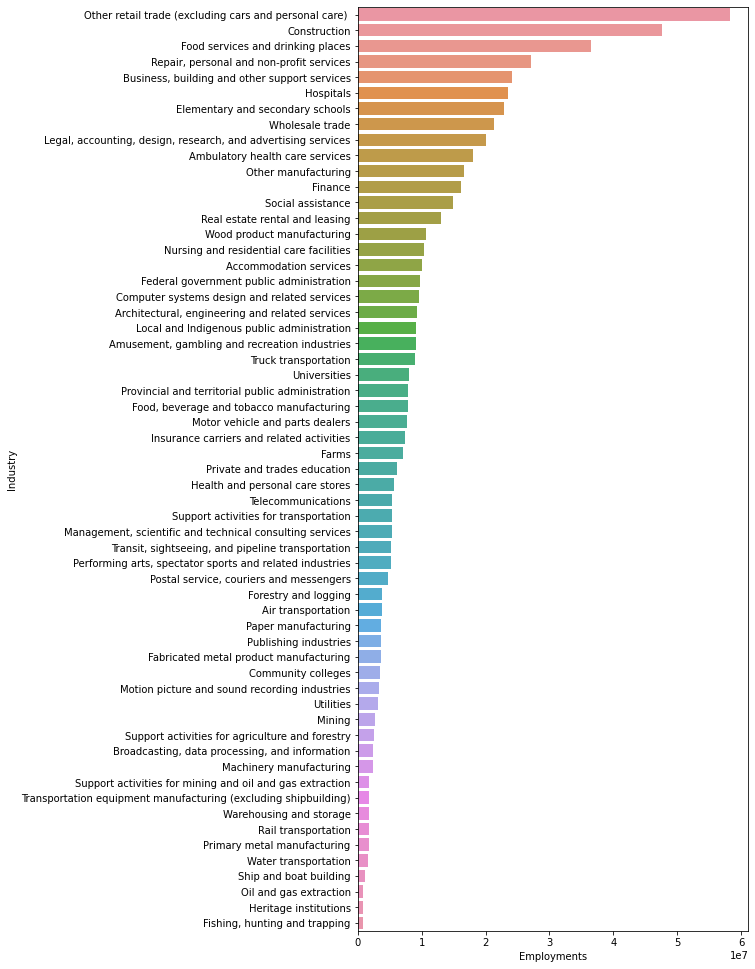

In [64]:
plt.figure(figsize=(7,17))
sns.barplot(x='Employments', y='Industry', data = total_df)

Time Series Analysis

In [65]:
data = pd.DataFrame(full_four_digit_updated_2.reset_index().groupby(['SYEAR_SMTH', 'Name'], as_index=False)['_EMPLOYMENT_'].sum())


In [66]:
data = data.pivot('SYEAR_SMTH', 'Name', '_EMPLOYMENT_')
data['total'] = data.sum(axis=1)
data = data.iloc[:-3]
data.index.freq = 'MS'

In [67]:
data.index

DatetimeIndex(['1997-01-01', '1997-02-01', '1997-03-01', '1997-04-01',
               '1997-05-01', '1997-06-01', '1997-07-01', '1997-08-01',
               '1997-09-01', '1997-10-01',
               ...
               '2018-12-01', '2019-01-01', '2019-02-01', '2019-03-01',
               '2019-04-01', '2019-05-01', '2019-06-01', '2019-07-01',
               '2019-08-01', '2019-09-01'],
              dtype='datetime64[ns]', name='SYEAR_SMTH', length=273, freq='MS')

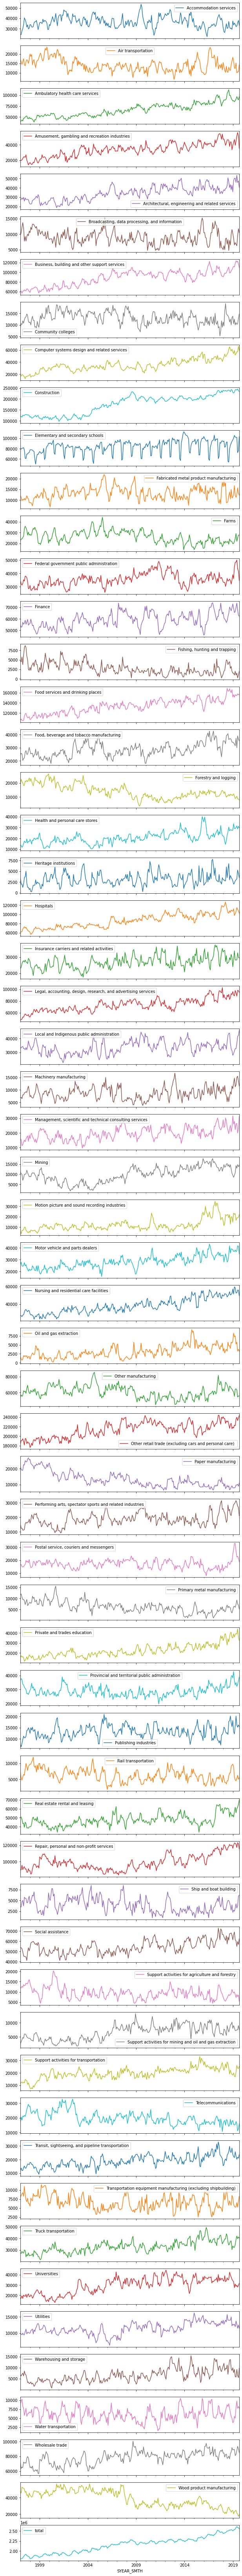

In [68]:
data.plot(subplots=True, figsize=(10, 120));


<AxesSubplot:title={'center':'Construction'}, xlabel='SYEAR_SMTH'>

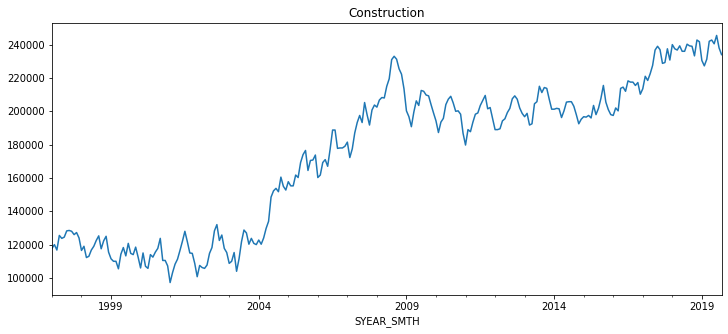

In [69]:
data['Construction'].plot(figsize=(12,5), title='Construction')


Comparing Total Employment and Construction¶


In [70]:
scaled_total = data['total']/data['total'][0]
scaled_construction = data['Construction']/data['Construction'][0]

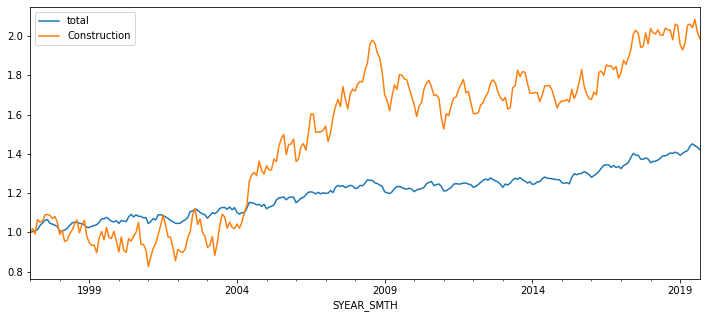

In [71]:
# plt.figure(dpi=200)
scaled_total.plot(legend=True, figsize=(12,5),)
scaled_construction.plot(legend=True);

In [72]:
data['Construction'].pct_change()

SYEAR_SMTH
1997-01-01         NaN
1997-02-01    0.019108
1997-03-01   -0.027083
1997-04-01    0.074946
1997-05-01   -0.013944
                ...   
2019-05-01    0.003099
2019-06-01   -0.009269
2019-07-01    0.020790
2019-08-01   -0.030550
2019-09-01   -0.016807
Freq: MS, Name: Construction, Length: 273, dtype: float64

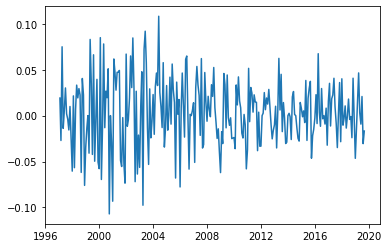

In [73]:
plt.plot(data['Construction'].pct_change())

<AxesSubplot:title={'center':'Elementary and secondary schools'}, xlabel='SYEAR_SMTH'>

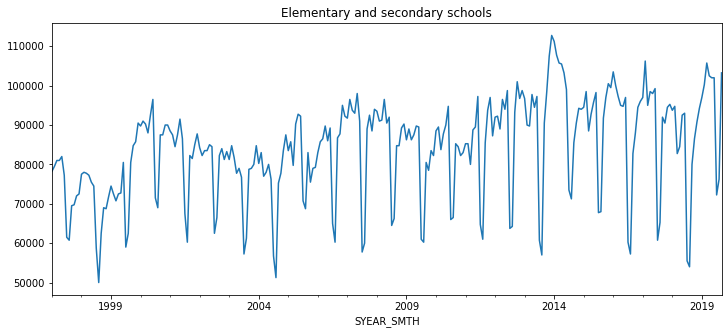

In [74]:
data['Elementary and secondary schools'].plot(figsize=(12,5), title='Elementary and secondary schools')